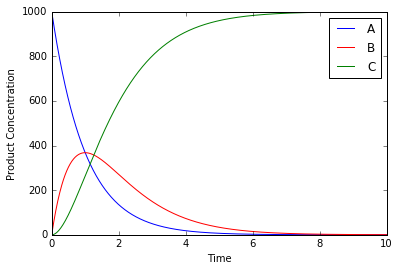

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
  
def simulation_set_of_equations(y, t, *args):
    k1 = args[0]
    k2 = args[1]
    
    A, B, C = y
    
    dA = -k1*A
    dB = k1*A - k2*B
    dC = k2*B
    
    return [dA, dB, dC]
 
# Parameters MM
k1 = 1
k2 = 1
params = (k1, k2)
 
# Initial Conditions MM
init_P = [1000, 0, 0]
  
# Timesteps
n_steps = 1000
t = np.linspace(0, 10, n_steps)
  
num_P = odeint(simulation_set_of_equations, init_P, t, args = (params))
plt.plot(t, num_P[:,0], c='b', label = 'A')
plt.plot(t, num_P[:,1], c='r', label = 'B')
plt.plot(t, num_P[:,2], c='g', label = 'C')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.legend(loc = 'best')
plt.show()

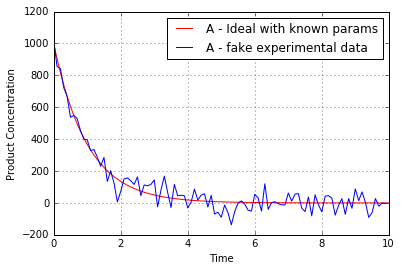

In [8]:
noise = np.random.normal(0, 50, num_P.shape)
exp_P = num_P + noise
exp_t = t[::10]
exp_P = exp_P[::10]
# Create experimental data.  Just take the regular simulation data and add some gaussian noise to it.

def residuals(p):
    p = tuple(p)
    sim_P = odeint(simulation_set_of_equations, init_P, exp_t, args = p)
    res = sim_P - exp_P
    return res.flatten()

plt.plot(t, odeint(simulation_set_of_equations, init_P, t, args = tuple(params))[:,0], c='r', label='A - Ideal with known params')
plt.plot(exp_t, exp_P[:,0], c='b', label='A - fake experimental data')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.grid()
plt.show()

In [9]:
from scipy.optimize import least_squares
initial_guess = (10, 10)
low_bounds = [0, 0]
up_bounds = [1000, 1000]
fitted_params = least_squares(residuals, initial_guess, bounds=(low_bounds, up_bounds)).x
# With least_squares function, unlike, say, curve_fit, it does not comput the covariance matrix for you
# TODO calculate standard deviation of paramater estimation (will this ever be used other than sanity checking?)
print(fitted_params)

[ 1.01754234  1.02757019]
